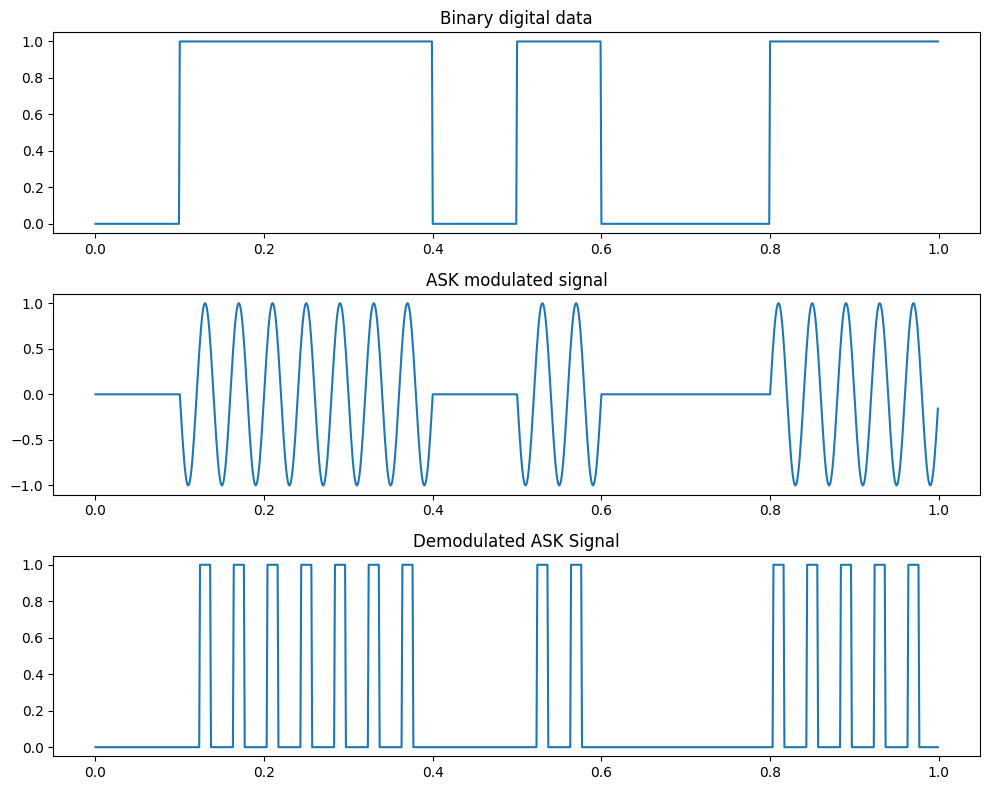

In [3]:
# This python script generates ASK modulated waveforms
# Library files
import matplotlib.pyplot as plt
import numpy as np
from math import pi

plt.close('all')

# Function to generate binary data
def binary(sym, sym_len):
    rand_n = np.random.rand(sym)
    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n <= 0.5)] = 0

    sig = np.zeros(int(sym*sym_len))

    # Generating symbols
    id1 = np.where(rand_n == 1)

    for i in id1[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

# ASK Demodulation
def ask_demodulation(modulated_signal, threshold):
    demodulated_signal = np.zeros_like(modulated_signal)
    
    for i, sample in enumerate(modulated_signal):
        if sample >= threshold:
            demodulated_signal[i] = 1
        else:
            demodulated_signal[i] = 0
            
    return demodulated_signal

# Carrier wave and binary waveform configuration parameters
Fs = 1000 # Samples per second
fc = 25 # Carrier frequency 100 Hz, 100 cycles/sec
T = 1 # Total simulation time in seconds
t = np.arange(0, T, 1/Fs)
x = np.sin(2*pi*fc*t)

Td = 0.1 # Bit duration
Nsamples = int(Td*Fs) # Samples in one bit duration
Nsym = int(np.floor(np.size(t)/Nsamples))

# Python code to generate binary stream of data
sig = binary(Nsym, Nsamples)

# ASK waveform generation
Xask = x * sig

# Demodulation parameters
threshold = 0.5

# ASK Demodulation
demodulated_signal = ask_demodulation(Xask, threshold)

# Binary waveform, ASK waveform, and Demodulated signal Plots
figure, axis = plt.subplots(3, 1, figsize=(10, 8))
axis[0].plot(t, sig)
axis[0].set_title("Binary digital data")

axis[1].plot(t, Xask)
axis[1].set_title("ASK modulated signal")

axis[2].plot(t, demodulated_signal)
axis[2].set_title("Demodulated ASK Signal")

plt.tight_layout()
plt.show()
